<a href="https://colab.research.google.com/github/ju-resplande/projeto_nlp/blob/main/Dados_REC_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtendo Dataset

In [ ]:
!pip install datasets ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140

In [ ]:
from datasets import load_dataset
import missingno as msno
from ydata_profiling import ProfileReport
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
data = load_dataset("ruanchaves/b2w-reviews01")

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.8/dist-packages/datasets/streaming.py:70: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return function(*args, use_auth_token=use_auth_token, **kwargs)


Dataset b2w-reviews01 downloaded and prepared to /root/.cache/huggingface/datasets/ruanchaves___b2w-reviews01/default/1.0.0/414dce7ecb4a1d15781c59f850c2abb5f36dca77358f366349c56501c50ba38d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(data.keys())

dict_keys(['train'])


In [ ]:
df = data['train'].to_pandas()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int32  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int32(1), object(12)


In [ ]:
#Dimensões
print("Nº de colunas: ", len(df.columns))
print("Nº de Linhas: ", len(df.axes[0]))

Nº de colunas:  14
Nº de Linhas:  132373


In [ ]:
#Informação
print("Nome das colunas: ")
for i in df.columns:
  print(i)

Nome das colunas: 
submission_date
reviewer_id
product_id
product_name
product_brand
site_category_lv1
site_category_lv2
review_title
overall_rating
recommend_to_a_friend
review_text
reviewer_birth_year
reviewer_gender
reviewer_state


## Breve Explicação sobre o dataset:

Este dataset "b2w-reviews01" é um conjunto de avaliações de produtos da **B2W (Americanas)**, uma empresa de comércio eletrônico na América Latina.

- "**submission_date**": Data em que a avaliação foi submetida;
- "**reviewer_id**": Id da avaliação;
- "**product_id**": Id do produto;
- "**product_name**": Nome do produto avaliado;
- "**product_brand**": Marca do produto;
- "**site_category_lv1**": Categoria do produto nível 1 (mais genérico) dentro do site da Americanas;
- "**site_category_lv2**": Categoria do produto nível 2 (mais específico) dentro do site da Americanas;
- "**review_title**": Título da avaliação;
- "**overall_rating**": Classificação dada pelo avaliador, com uma escala de 1 a 5 estrelas;
- "**recommend_to_a_friend**": Se o Avaliador recomendaria pra um amigo (sim ou não)
- "**review_text**": Texto/corpo da avaliação;
-  "**reviewer_birth_year**": Ano de nascimento do avaliador;
- "**reviewer_gender**": Gênero ao qual o avaliador se identifica;
- "**reviewer_state**": Estado onde o avaliador reside.


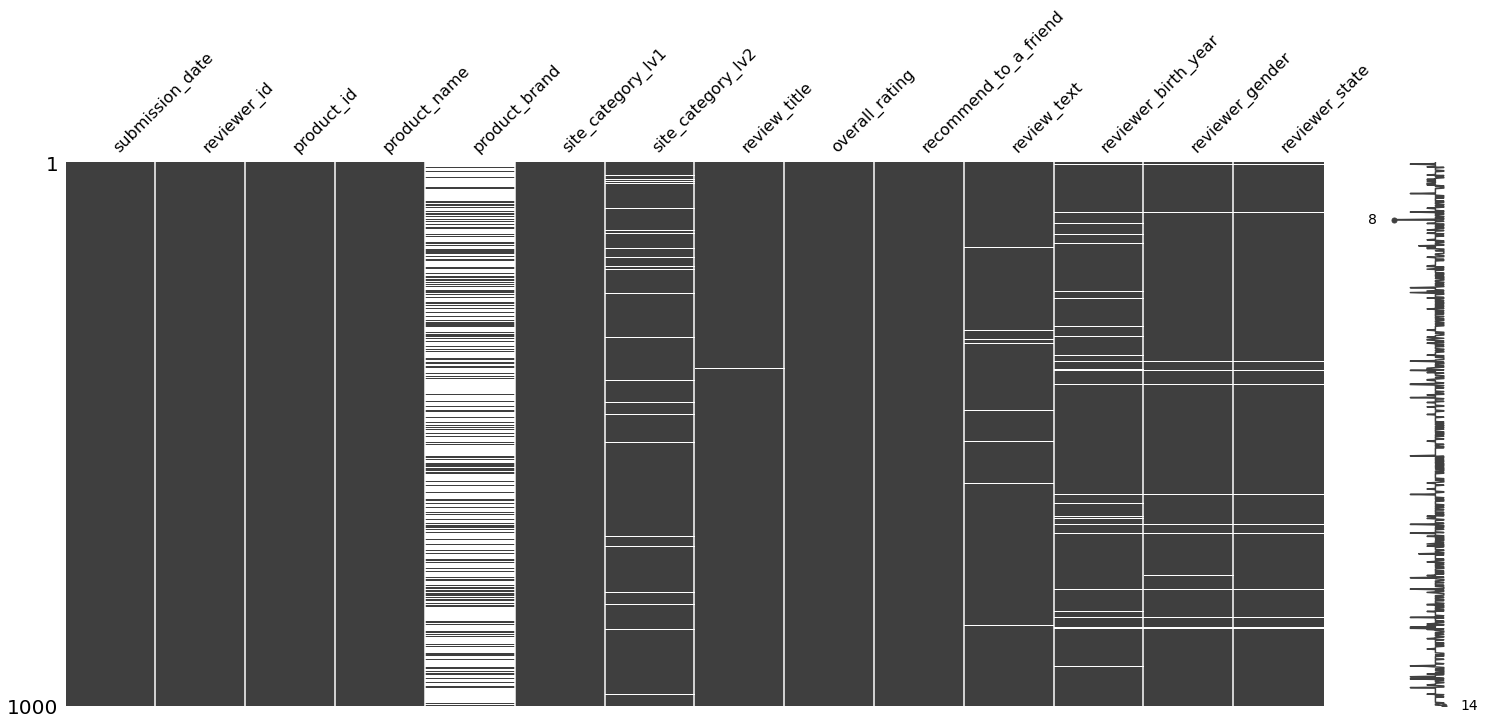

In [ ]:
#Visão de um sample de 1000 linhas, sobre o quanto de dados estão faltando
msno.matrix(df.sample(1000))

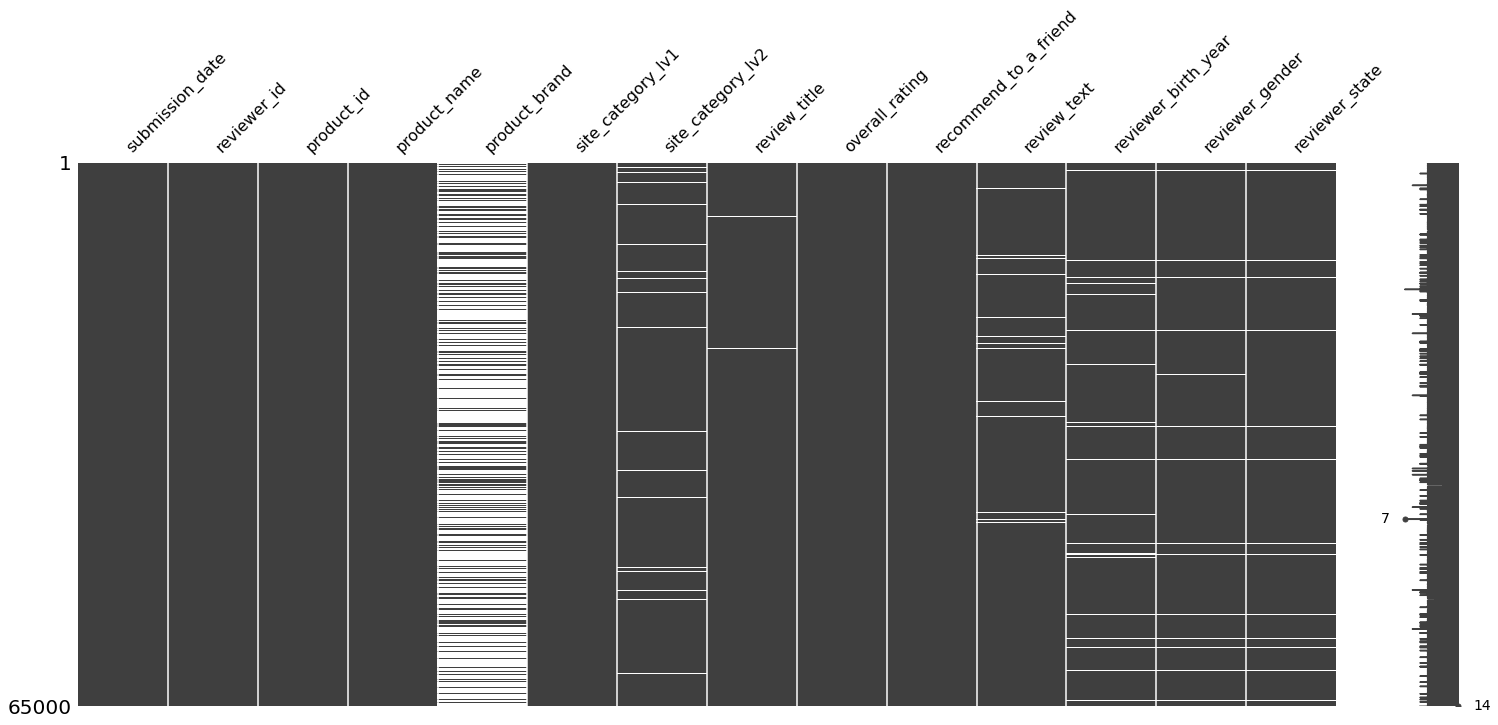

In [ ]:
#Visão de um sample de 65000 linhas (50%), sobre o quanto de dados estão faltando
msno.matrix(df.sample(65000))

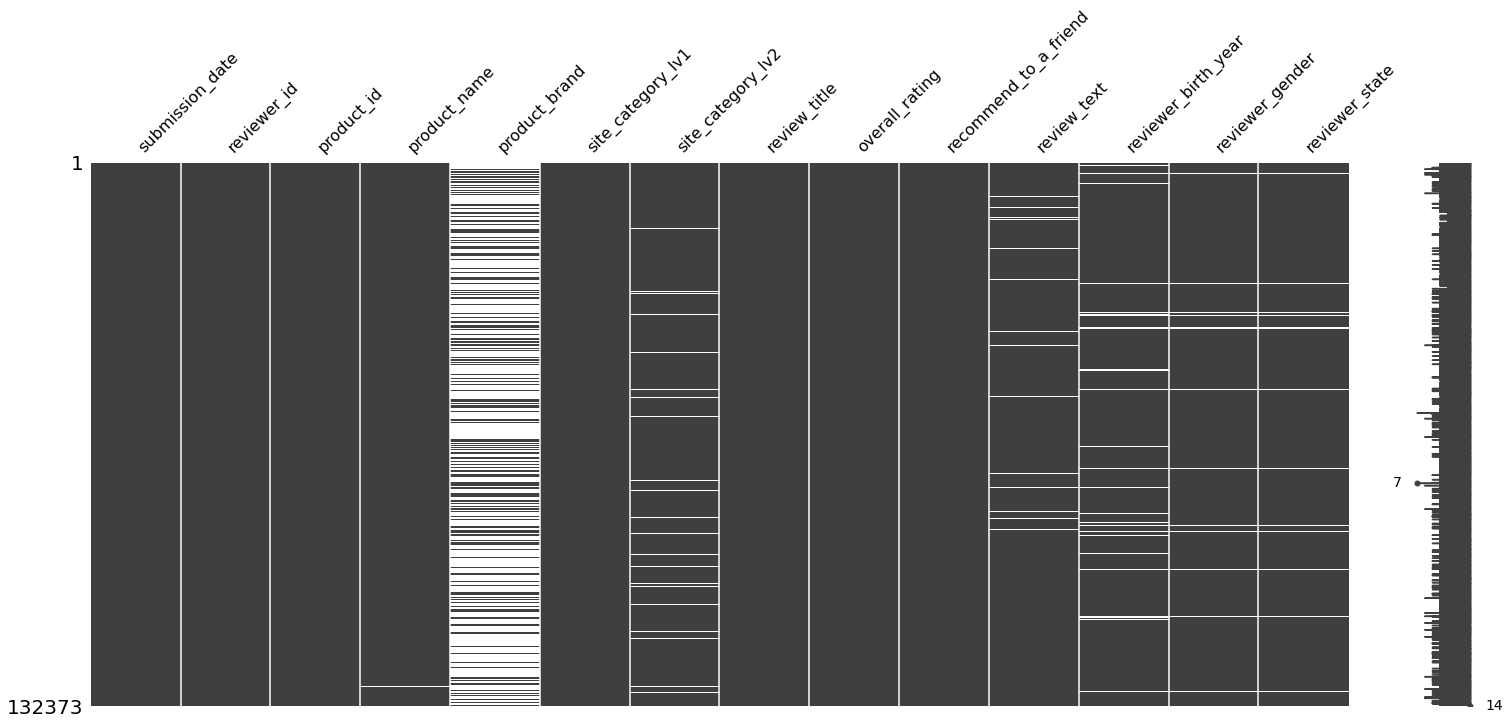

In [ ]:
#Visão de um sample de 132327 linhas (100%), sobre o quanto de dados estão faltando
msno.matrix(df)

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Tratamento Geral dos Dados


### Excluindo as avaliações de valor 3 (rating = 3)

In [ ]:
#df= df[df['overall_rating'] != 3]

In [ ]:
df['overall_rating'].value_counts()

5    47955
4    32345
1    27369
3    16315
2     8389
Name: overall_rating, dtype: int64

### Junção da Coluna de Título + Corpo da Reviewer

In [ ]:
df['review'] = df['review_title'] + '\n' + df['review_text']

### Criação da coluna Tamanho da Avaliação (com base apenas no corpo da Avaliação)

In [ ]:
tamanhos=[]
for i in df['review_text']:
  if i is None:
    tamanhos.append(0)
  else:
    tamanhos.append(len(i))


In [ ]:
df['len_review_text'] = tamanhos

In [ ]:
df.sort_values(by="len_review_text",ascending=True)

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,review,len_review_text
126053,2018-05-22 18:13:14,6acf256aaa518971fbf0c4da059102b795607264b5b651...,14262532,Celular Ipro I3200 Dual Chip Desbloqueado Pret...,None,Celulares e Smartphones,Celular,"nem recedbi o produto, como posso avaliar algo...",1,No,None,1982.0,F,RJ,NaN,0
56089,2018-03-11 14:32:48,cd497c213cb14992a09a76c5408ad6ea56bfba9ebd9d77...,27780410,Funko Pop! Deadpool - Marvel,None,Brinquedos,Bonecos,compra total,4,Yes,None,NaN,M,SP,NaN,0
56092,2018-03-11 14:41:20,cd497c213cb14992a09a76c5408ad6ea56bfba9ebd9d77...,10520202,Spider-Man / Homem-Aranha - Funko Pop Marvel,None,Brinquedos,Bonecos,storegamers,4,Yes,None,NaN,M,SP,NaN,0
87175,2018-04-11 21:32:23,84f9ef7bdd0db1e3779818830a82239a7b8ba749c86891...,25307454,Painel Gama Branco Brilho,None,Móveis,"Rack, Estante e Painel",Ruim,1,No,None,1964.0,F,SP,NaN,0
25423,2018-01-20 07:09:28,0d91ee4af408eaec5a8200b5dc718a2c317be679b1a3c7...,16086982,Prancha Nano Titanium Babyliss Pro Degrade Op ...,None,Beleza e Perfumaria,Cabelo,Melhor prancha que existe para fazer progressiva,5,Yes,None,1972.0,F,SP,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131513,2018-05-30 11:18:05,28bb47c48db40656794cf727637781e9c7e45bd2ea2403...,20797761,Rack com Painel para TV até 55 Polegadas Twin ...,None,Móveis,"Rack, Estante e Painel",Não recomendo,1,No,Porque não recomendo este produto: 1) O produ...,1988.0,M,SP,Não recomendo\nPorque não recomendo este produ...,3119
119571,2018-05-15 09:07:19,88878f4c3008f1d3129fd70138ceaa43ba1d7b148026b8...,18831067,Controle Joystick Bluetooth Ipega Pg9025 Para ...,None,Celulares e Smartphones,None,PRODUTO AINDA NÃO CHEGOU,1,No,PRODUTO AINDA NÃO CHEGOU PRODUTO AINDA NÃO CHE...,1990.0,M,RR,PRODUTO AINDA NÃO CHEGOU\nPRODUTO AINDA NÃO CH...,3924
119572,2018-05-15 09:07:19,88878f4c3008f1d3129fd70138ceaa43ba1d7b148026b8...,18831067,Controle Joystick Bluetooth Ipega Pg9025 Para ...,None,Celulares e Smartphones,None,PRODUTO AINDA NÃO CHEGOU,1,No,PRODUTO AINDA NÃO CHEGOU PRODUTO AINDA NÃO CHE...,1990.0,M,RR,PRODUTO AINDA NÃO CHEGOU\nPRODUTO AINDA NÃO CH...,3924
41017,2018-02-21 13:10:06,e853f5eb346e5be47c017c68651645802ca5ca9b0f45c3...,29621951,Iphone 6s Plus Tela 5.5” IOS 9 16GB Câmera 12M...,None,Celulares e Smartphones,Smartphone,gostei muito pena que não tem desconto,3,Yes,pena que não tem desconto pena que não tem de...,2001.0,M,SP,gostei muito pena que não tem desconto\npena q...,4134


### Criando as classes ( divisão dos dados em bom ou ruim [1 ou 0]) 

In [ ]:
condicoes=[
     (df['overall_rating']<=2),
     (df['overall_rating']==3),
     (df['overall_rating']>=4)
 ]
classes=[-1,0,1]

In [ ]:
df['rating_teste']=np.select(condicoes,classes)

In [ ]:
df['rating_teste'].value_counts()

 1    80300
-1    35758
 0    16315
Name: rating_teste, dtype: int64

In [ ]:
#df['rating']=(df['overall_rating']>=4).astype(int)

<ipython-input-20-50db806b51cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating']=(df['overall_rating']>=4).astype(int)


In [ ]:
df['rating'].value_counts()

1    80300
0    35758
Name: rating, dtype: int64

### Exclusão das colunas não necessárias

In [ ]:
df = df.drop(['product_brand', 'reviewer_birth_year','reviewer_gender','reviewer_state','site_category_lv2'], axis=1)

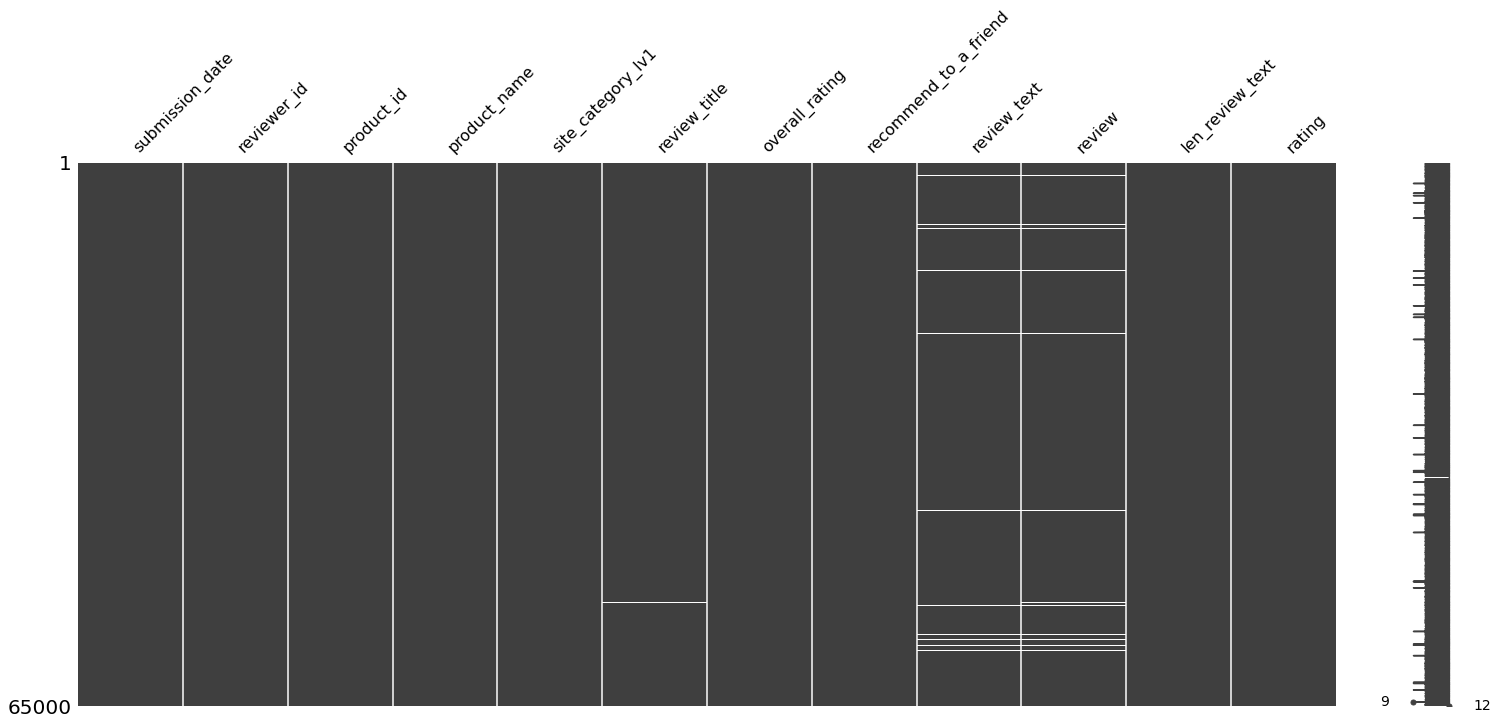

In [ ]:
msno.matrix(df.sample(65000))

Como ainda existem valores faltantes, agora iremos retirar as linhas correspondentes

### Excluindo linhas que possuem valores faltantes (em qualquer coluna)

In [ ]:
colunas = df.columns
for i in colunas:
  df = df[df[i].notna()]

In [ ]:
df['rating'].value_counts() #existe um desbalanceamento aqui

1    79120
0    33689
Name: rating, dtype: int64

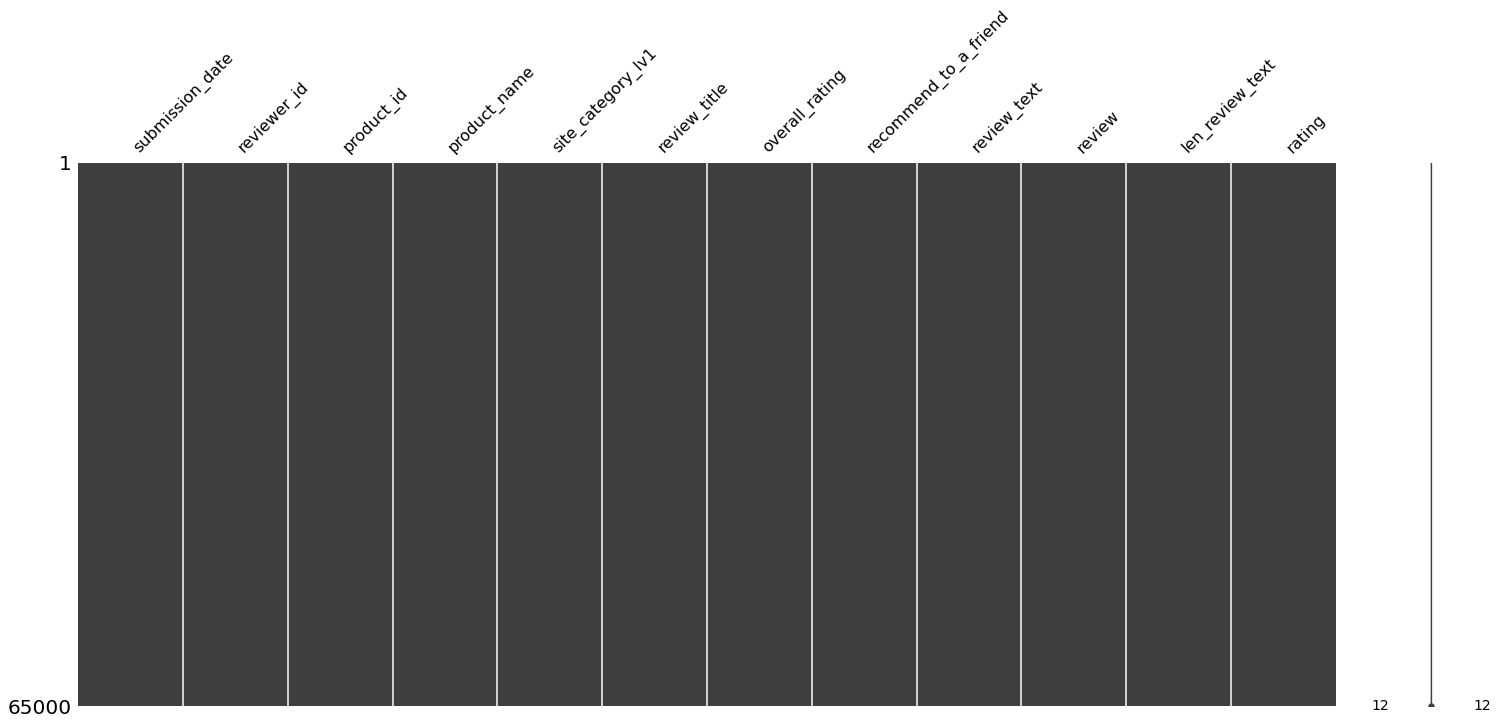

In [ ]:
msno.matrix(df.sample(65000))

### Fazendo o Balanceamento dos dados
- Neste caso foi feito o Down-Sample

In [ ]:
g = df.groupby('rating')
df_down_sample =g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df_down_sample['rating'].value_counts()


0    33689
1    33689
Name: rating, dtype: int64

Apenas conferi se realmente estavam balanceados

In [ ]:
count=0
for i in df_down_sample['rating']:
  if i ==1:
    count+=1
print(count)

33689


### Separando Dataset em Teste (20% geral) e Treino (80% do geral)

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(df_down_sample,df_down_sample['rating'],test_size=0.2)
df_train, df_test = train_test_split(df_down_sample, test_size=0.2)

Apenas conferindo a persistência do balanceamento

In [ ]:
df_test['rating'].value_counts()

0    6771
1    6705
Name: rating, dtype: int64

In [ ]:
df_train['rating'].value_counts()

1    26984
0    26918
Name: rating, dtype: int64

### Dividindo o dataset de treino em Duas partes ( SA e REC)

In [ ]:
df_train_SA, df_train_REC = train_test_split(df_train, test_size=0.5)

Confirmando que o balanceamento entre as duas classes permanece

In [ ]:
df_train_SA['rating'].value_counts()

0    13506
1    13445
Name: rating, dtype: int64

In [ ]:
df_train_REC['rating'].value_counts()

1    13539
0    13412
Name: rating, dtype: int64

In [ ]:
#df2 = df[['reviewer_id','product_id','review_title','review_text','product_name','site_category_lv1', 'overall_rating']]

## Tratamento dos dados para REC

### Seleção das colunas de interesse pra REC

In [ ]:
df_train_REC_2 = df_train_REC[['review','len_review_text','reviewer_id','product_id','review_title','review_text','product_name','site_category_lv1', 'overall_rating', 'rating']]

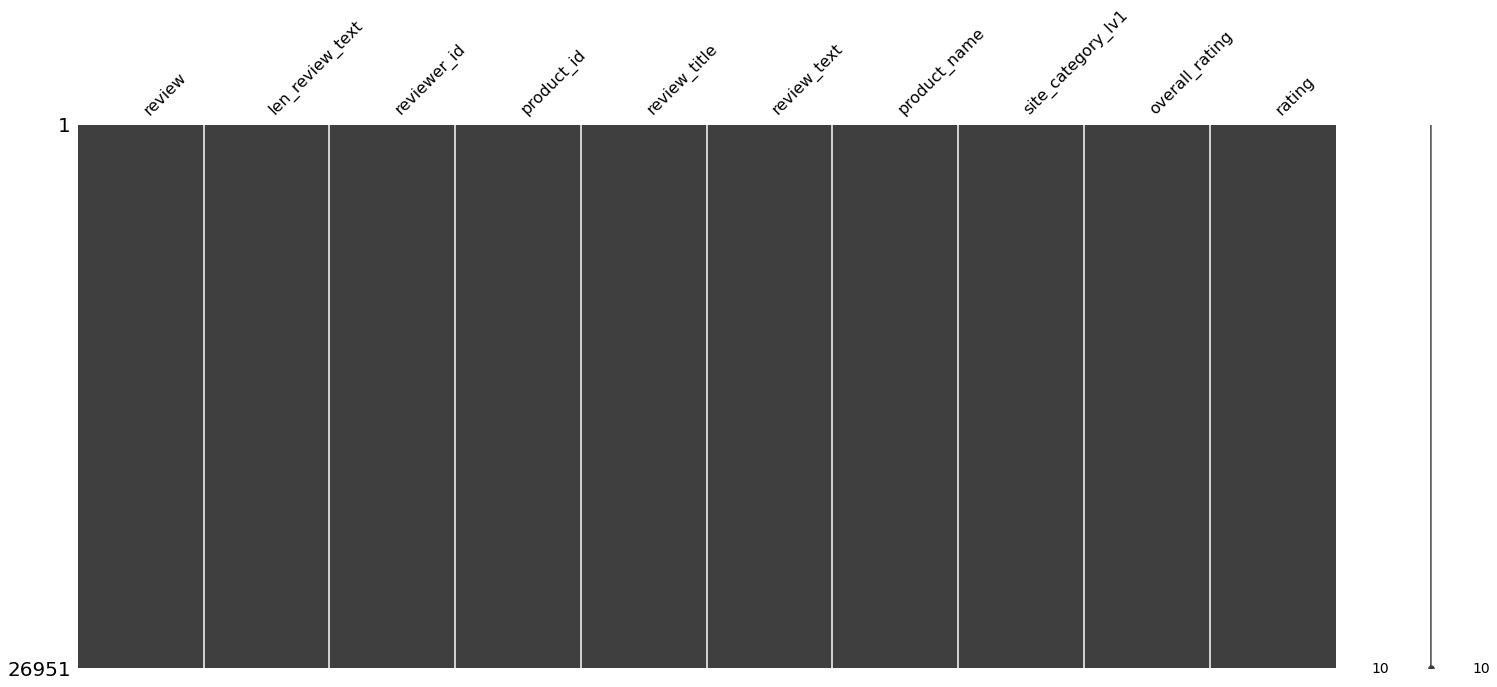

In [ ]:
msno.matrix(df_train_REC_2)

### Confirmando o balanceamento

In [ ]:
df_train_REC_2['rating'].value_counts()

1    13539
0    13412
Name: rating, dtype: int64

In [ ]:
df_train_REC_2.describe()

,len_review_text,overall_rating,rating
count,26951.000000,26951.000000,26951.000000
mean,151.814812,2.929131,0.502356
std,138.992809,1.740115,0.500004
min,50.000000,1.000000,0.000000
25%,71.000000,1.000000,0.000000
50%,105.000000,4.000000,1.000000
75%,178.500000,5.000000,1.000000
max,3924.000000,5.000000,1.000000


In [ ]:
df_train_REC_2

review  \
rating                                                            
1      31395  MARAVILHOSO RECOMENDADISSIMO\nCAMA NEOPRENE MU...   
       23661  Excelente\nMuito Bom!  Roda bem todos os aplic...   
       5928   Atende ao proposto\nRealmente é silencioso, po...   
0      8579   Não recebi!\nEfetuei a compra no site e não re...   
       13143  Iluminação\nEncomendei preto veio branco, pisc...   
...                                                         ...   
       32056  Ruim já veio com problema.\nComprei uma smart ...   
1      27359  Gostei muito do produto!\nProdutos bons para o...   
       5472   Gostei muito do produto\nGostei muito de compr...   
0      9469   Não gostei\nAo comprar o produto, fui informad...   
       31854  Ruim\nVeio com defeito, não tem força no lança...   

              len_review_text  \
rating                          
1      31395               80   
       23661               73   
       5928                65   
0      8579               106   
       13143              106   
...                       ...   
       32056               99   
1      27359               51   
       5472               180   
0      9469               273   
       31854               78   

                                                    reviewer_id product_id  \
rating                                                                       
1      31395  18ee03d2b61475a06d23477060c435ca89e41452667267...   10853030   
       23661  7f38421667d7069e3e0cf639b7db68ca0e62367e627833...  131471591   
       5928   114f5a49b4419ec7db03f6f592324ce1c0efac5b467c3b...   29351406   
0      8579   ffe70bc398d79a8a1539315fdc34db8ec63d4140e38b2f...  131018163   
       13143  50a1167d5ac6fcfd466f5856bd5e684c9d5cf27eb270fe...   22589095   
...                                                         ...        ...   
       32056  414727f5eaf031c2b068ef751001b3d43d27108b1b53a7...  132846809   
1      27359  1510827f05f35d747913f1b6198ea17ef7ff2e38b57a26...   29529868   
       5472   cafb038360a51705c48a19bac299b90a468d31466922db...    8264959   
0      9469   2531a0a0f19d6356d8f72cadf66d5df26c1131e1286f17...  122606043   
       31854  312819a6655c2a46179a1c5fc1caf872adeb76b5d64e81...  121901075   

                              review_title  \
rating                                       
1      31395  MARAVILHOSO RECOMENDADISSIMO   
       23661                     Excelente   
       5928             Atende ao proposto   
0      8579                    Não recebi!   
       13143                    Iluminação   
...                                    ...   
       32056    Ruim já veio com problema.   
1      27359      Gostei muito do produto!   
       5472        Gostei muito do produto   
0      9469                     Não gostei   
       31854                          Ruim   

                                                    review_text  \
rating                                                            
1      31395  CAMA NEOPRENE MUITO BOA FORTE E TAMBÉM PROTEGI...   
       23661  Muito Bom!  Roda bem todos os aplicativos. Boa...   
       5928   Realmente é silencioso, potente, bom tamanho e...   
0      8579   Efetuei a compra no site e não recebi a mercad...   
       13143  Encomendei preto veio branco, pisca sem parar ...   
...                                                         ...   
       32056  Comprei uma smart tv 40 no mesmo dia que insta...   
1      27359  Produtos bons para os cabelos, bom custo benef...   
       5472   Gostei muito de comprar nas Lojas Americanas p...   
0      9469   Ao comprar o produto, fui informado a data de ...   
       31854  Veio com defeito, não tem força no lançamento ...   

                                                   product_name  \
rating                                                            
1      31395  Capa Para Tablet 10 - Targus Zamba Tss13505us ...   
       23661  Smart TV LED 40" Toshiba 40L2600 Full HD com C...   
 

## Tratamento dos dados para SA

### Seleção das colunas de interesse pra SA

In [ ]:
df_train_SA_2 = df_train_SA[['review','len_review_text','review_title','review_text', 'overall_rating', 'rating']]

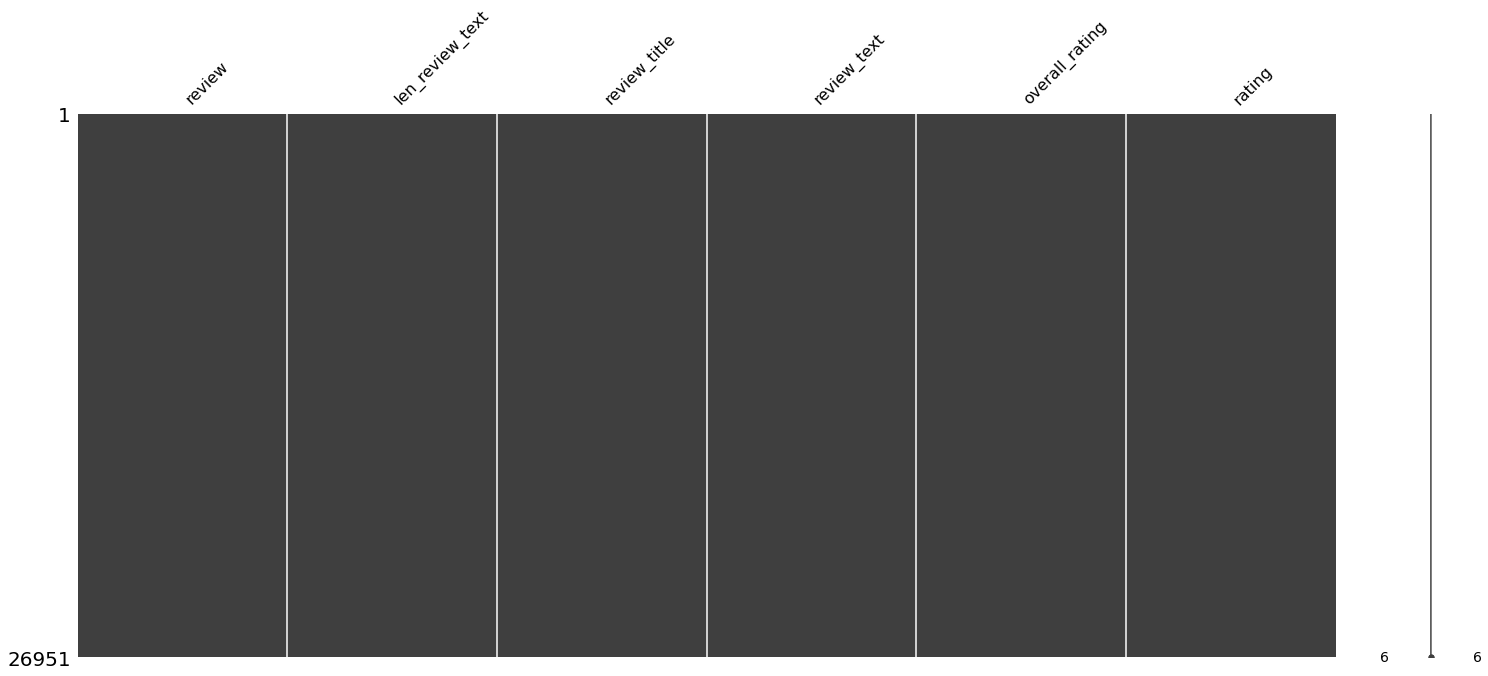

In [ ]:
msno.matrix(df_train_SA_2)

### Confirmando o Balanceamento

In [ ]:
df_train_SA_2['rating'].value_counts()

0    13506
1    13445
Name: rating, dtype: int64

In [ ]:
df_train_SA_2.describe()

,len_review_text,overall_rating,rating
count,26951.000000,26951.000000,26951.000000
mean,151.682609,2.909725,0.498868
std,141.393539,1.739185,0.500008
min,50.000000,1.000000,0.000000
25%,72.000000,1.000000,0.000000
50%,106.000000,2.000000,0.000000
75%,177.000000,5.000000,1.000000
max,4548.000000,5.000000,1.000000


In [ ]:
df_train_SA_2

review  \
rating                                                            
1      20598  ótimo produto e preço\nA compra e preço foram ...   
0      3245   Não comprem !!!! Impressora importada.\nNão co...   
       5539   Ainda não recebi o produto.\nAinda não chegou ...   
       8687   Não era o que eu esperava\nNão gostei esperava...   
1      26181  Bom produto\nRecomendo o produto a todos...mar...   
...                                                         ...   
       13847  Muito boa!\nBanqueta de qualidade e um acabame...   
0      25945  O produto até o momento não chegou\nMuita demo...   
1      20421  Elogio\nÓtimo produto recomendo,aparelho funci...   
0      88     Estava aberto, sem o lacre.\nBom dia! A bateri...   
1      15984  Otimo\nMuito bom, pelo valor vale apena compra...   

              len_review_text                            review_title  \
rating                                                                  
1      20598              119                   ótimo produto e preço   
0      3245               330  Não comprem !!!! Impressora importada.   
       5539                54             Ainda não recebi o produto.   
       8687               110               Não era o que eu esperava   
1      26181               52                             Bom produto   
...                       ...                                     ...   
       13847              107                              Muito boa!   
0      25945              133      O produto até o momento não chegou   
1      20421               89                                  Elogio   
0      88                 209             Estava aberto, sem o lacre.   
1      15984               99                                   Otimo   

                                                    review_text  \
rating                                                            
1      20598  A compra e preço foram ótimos, recebi o celula...   
0      3245   Não comprem esta impressora pois não existe ca...   
       5539   Ainda não chegou o Produto,estou no aguardo. O...   
       8687   Não gostei esperava muito mais desse jogo infe...   
1      26181  Recomendo o produto a todos...marca oster semp...   
...                                                         ...   
       13847  Banqueta de qualidade e um acabamento perfeito...   
0      25945  Muita demora, não sei nem se o produto irá che...   
1      20421  Ótimo produto recomendo,aparelho funcionando c...   
0      88     Bom dia! A bateria descarrega rápida e o tecla...   
1      15984  Muito bom, pelo valor vale apena comprar. Xxxx...   

              overall_rating  rating  
rating                                
1      20598               5       1  
0      3245                1       0  
       5539                1       0  
       8687                2       0  
1      26181               4       1  
...                      ...     ...  
       13847               5       1  
0      25945               1       0  
1      20421               4       1  
0      88                  2       0  
1      15984               4       1  

[26951 rows x 6 columns]